In [1]:
#Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import CSV file
emission = pd.read_csv("ghg-emissions.csv", encoding="ISO-8859-1")
region = pd.read_csv("Clean_Data\Cleaner_Region_Income_data.csv", encoding="ISO-8859-1")

In [3]:
region.head()

,Country,Region,IncomeGroup
0,Aruba,Latin America & Caribbean,High income
1,Afghanistan,South Asia,Low income
2,Angola,Sub-Saharan Africa,Lower middle income
3,Albania,Europe & Central Asia,Upper middle income
4,Andorra,Europe & Central Asia,High income


In [4]:
#clean data by dropping the uni columns
#clean data by removing rows with no countries or data (dropNA)
clean = emission.drop(columns=["unit"])
emission_df = clean.dropna()
emission_df = emission_df.rename(columns={"Country/Region":"Country"})
emission_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,China,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,4103.23,...,9046.19,9872.37,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81
1,United States,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,6293.80,...,5793.66,6041.59,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35
2,India,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,1382.26,...,2467.78,2576.93,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63
3,Russia,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,1755.59,1740.23,...,1575.54,1690.93,1864.86,1886.41,1844.48,1841.26,1791.21,1918.26,1939.26,1992.08
4,Indonesia,1257.1,1274.43,1295.01,1311.27,1327.87,1360.88,1179.00,2142.82,1373.56,...,1483.61,1125.25,1675.72,1695.27,1636.17,2016.28,2070.24,1453.23,1466.05,1703.86


In [5]:
emission_complete = pd.merge(emission_df, region, how="inner", on="Country")
emission_complete.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,Region,IncomeGroup
0,China,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,4103.23,...,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81,East Asia & Pacific,Upper middle income
1,United States,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,6293.80,...,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35,North America,High income
2,India,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,1382.26,...,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63,South Asia,Lower middle income
3,Indonesia,1257.1,1274.43,1295.01,1311.27,1327.87,1360.88,1179.00,2142.82,1373.56,...,1675.72,1695.27,1636.17,2016.28,2070.24,1453.23,1466.05,1703.86,East Asia & Pacific,Lower middle income
4,Brazil,1642.29,1669.56,1679.50,1689.70,1706.03,1726.08,1735.71,1766.32,1800.62,...,1270.59,1311.58,1335.02,1372.79,1354.28,1443.98,1461.43,1420.58,Latin America & Caribbean,Upper middle income


In [6]:
#emission_complete.to_csv('merged_emissions_region.csv')

In [7]:
regional_emission = emission_complete.groupby("IncomeGroup").sum()

regional_emission.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,13109.52,13098.43,13152.54,13347.07,13507.59,13873.50,14059.77,14105.06,14118.99,14342.48,...,13714.14,14173.10,13787.45,13635.73,13662.90,13525.01,13463.73,13592.55,13573.31,13623.96
Low income,689.86,698.55,703.30,718.56,729.09,723.14,749.16,793.92,802.97,799.95,...,992.36,1033.09,1029.57,1066.68,1086.79,1113.38,1148.30,1221.98,1225.06,1246.05
Lower middle income,5192.32,5178.76,5207.00,5235.25,5346.01,5174.15,6206.40,5482.56,5488.59,5453.72,...,7276.86,7157.07,7813.97,8017.78,8088.86,8690.88,8834.62,8447.37,8640.92,9129.48
Upper middle income,8229.52,8312.75,8547.54,8724.26,9153.65,9290.21,9401.99,9595.45,9432.83,9719.44,...,15429.75,16511.94,15869.59,16311.34,16837.61,16900.29,16874.50,17569.68,17869.98,18167.66


In [8]:
reg_emissionT = regional_emission.transpose()
reg_emissionT = pd.DataFrame(reg_emissionT)
reg_emissionT = reg_emissionT.reset_index()
print(reg_emissionT.columns.tolist())

['index', 'High income', 'Low income', 'Lower middle income', 'Upper middle income']


Text(0, 0.5, 'MTCO2e')

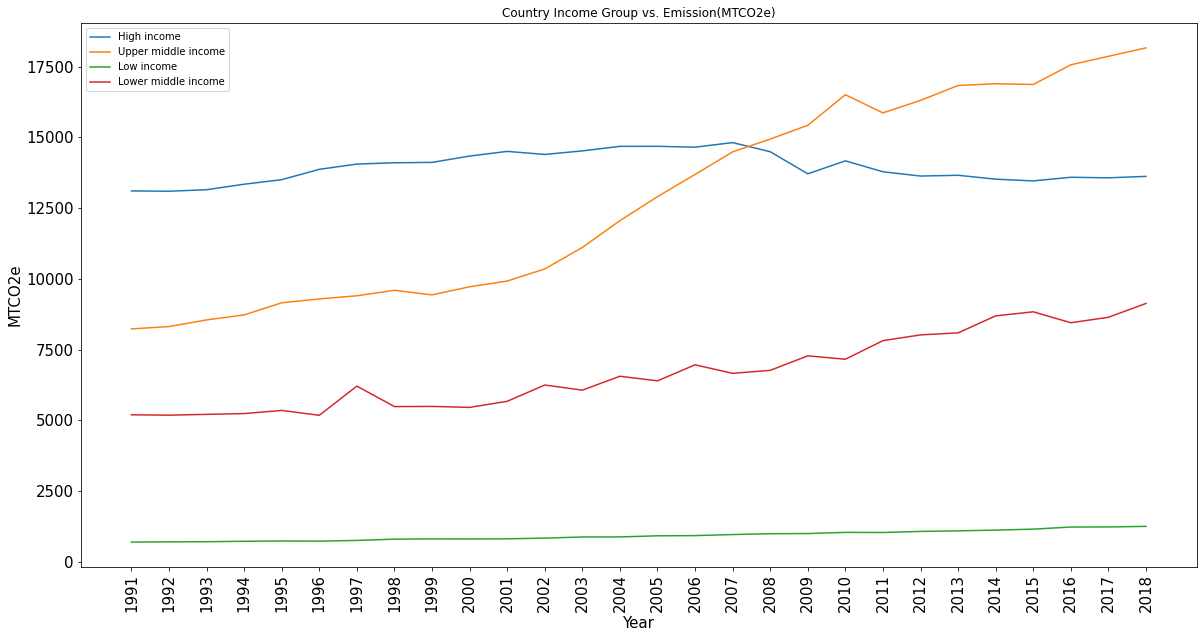

In [12]:
#Metric tons of carbon dioxide equivalent or MTCO2e is the unit of measurement in this tool. 
#The unit "CO2e" represents an amount of a GHG whose atmospheric impact has been standardized to that of one unit 
#mass of carbon dioxide (CO2), based on the global warming potential (GWP) of the gas.
plt.figure(figsize=(20,10))
plt.plot(reg_emissionT["index"], reg_emissionT["High income"], label="High income")
plt.plot(reg_emissionT["index"], reg_emissionT["Upper middle income"], label="Upper middle income")
plt.plot(reg_emissionT["index"], reg_emissionT["Low income"], label="Low income")
plt.plot(reg_emissionT["index"], reg_emissionT["Lower middle income"], label="Lower middle income")
plt.title("Country Income Group vs. Emission(MTCO2e)")
plt.legend()
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.xlabel("Year" , fontsize=15)
plt.ylabel("MTCO2e", fontsize=15)